In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
def generate_points(a: float, b: float, x0: float, y0: float):
    t = np.arange(0, 2*np.pi, 0.025)
    points = np.zeros((t.shape[0], 2))
    points[:, 0] = a * np.cos(t) + x0
    points[:, 1] = b * np.sin(t) + y0
    return points

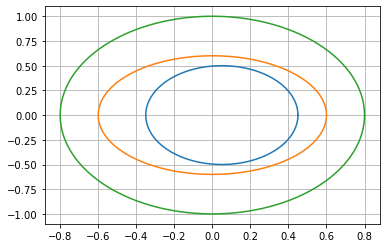

In [3]:
points1 = generate_points(0.4, 0.5, 0.05, 0)
points2 = generate_points(0.6, 0.6, 0, 0)
points3 = generate_points(0.8, 1, 0, 0)
plt.plot(points1[:, 0], points1[:, 1])
plt.plot(points2[:, 0], points2[:, 1])
plt.plot(points3[:, 0], points3[:, 1])
plt.grid(True)
plt.show()

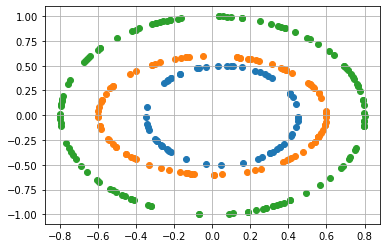

In [4]:
points1 = points1[np.random.choice(points1.shape[0], 60),:]
points2 = points2[np.random.choice(points2.shape[0], 100),:]
points3 = points3[np.random.choice(points3.shape[0], 120),:]

plt.scatter(points1[:, 0], points1[:, 1])
plt.scatter(points2[:, 0], points2[:, 1])
plt.scatter(points3[:, 0], points3[:, 1])
plt.grid(True)
plt.show()

In [5]:
features = np.concatenate((points1, points2, points3))
labels = np.concatenate((np.full(60, 0), np.full(100, 1), np.full(120, 2)))

In [6]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=23)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=0.33, random_state=26)
print(x_train.shape[0] / 280, x_valid.shape[0] / 280, x_test.shape[0] / 280)

0.7 0.2 0.1


In [7]:
model = keras.Sequential([
    keras.Input(shape=(2,)),
    layers.Dense(25, activation='relu'),
    layers.Dense(3, activation='softmax')
])
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=["accuracy"]
)

2021-10-13 00:24:37.124856: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-13 00:24:37.126890: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [8]:
model.fit(x_train, y_train, batch_size=32, epochs=1000)

Train on 196 samples
Epoch 1/1000
196/196 [==============================] - 1s 4ms/sample - loss: 1.1149 - accuracy: 0.2857
Epoch 2/1000
196/196 [==============================] - 0s 86us/sample - loss: 1.1106 - accuracy: 0.3061
Epoch 3/1000
196/196 [==============================] - 0s 87us/sample - loss: 1.1068 - accuracy: 0.3163
Epoch 4/1000
196/196 [==============================] - 0s 88us/sample - loss: 1.1031 - accuracy: 0.3469
Epoch 5/1000
196/196 [==============================] - 0s 82us/sample - loss: 1.0993 - accuracy: 0.3520
Epoch 6/1000
196/196 [==============================] - 0s 78us/sample - loss: 1.0955 - accuracy: 0.3469
Epoch 7/1000
196/196 [==============================] - 0s 81us/sample - loss: 1.0916 - accuracy: 0.3622
Epoch 8/1000
196/196 [==============================] - 0s 80us/sample - loss: 1.0881 - accuracy: 0.3878
Epoch 9/1000
196/196 [==============================] - 0s 79us/sample - loss: 1.0847 - accuracy: 0.4082
Epoch 10/1000
196/196 [============

In [9]:
model.evaluate(x_valid, y_valid, verbose=2)
model.evaluate(x_test, y_test, verbose=2)

56/1 - 0s - loss: 0.6244 - accuracy: 1.0000
28/1 - 0s - loss: 0.6128 - accuracy: 1.0000


[0.6127995252609253, 1.0]

In [10]:
a = np.mgrid[-1.2:1.2:0.025, -1.2:1.2:0.025].reshape(2, -1).T
a

array([[-1.2  , -1.2  ],
       [-1.2  , -1.175],
       [-1.2  , -1.15 ],
       ...,
       [ 1.175,  1.125],
       [ 1.175,  1.15 ],
       [ 1.175,  1.175]])

In [11]:
labels = model.predict_classes(a, 1, verbose=0)
l = np.c_[labels, labels]

In [12]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
x_min, x_max = a[:,0].min() - .1, a[:,0].max() + .1
y_min, y_max = a[:,1].min() - .1, a[:,1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
z = model.predict_classes(np.c_[xx.ravel(), yy.ravel()])

/Users/denissin/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  after removing the cwd from sys.path.


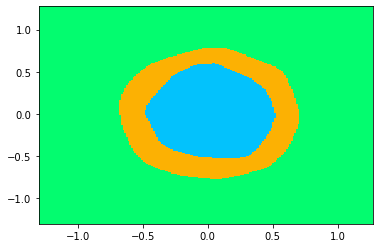

In [13]:
cmap_light = ListedColormap(['#03c2fc', '#fcb103', '#03fc6f'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
z = z.reshape(xx.shape)
plt.pcolormesh(xx, yy, z, cmap=cmap_light)

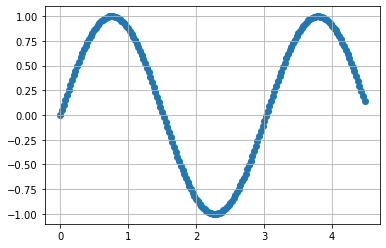

In [14]:
xt = lambda t: np.sin(0.66 * np.pi * t)
features = np.arange(0, 5, 0.025)
targets = xt(features)
n = int(0.9 * features.shape[0])
x_train, y_train = features[:n], targets[:n]
x_test, y_test = features[n:], targets[n:]
plt.scatter(x_train, y_train)
plt.grid(True)
plt.show()

In [23]:
approx_model = keras.Sequential([
    keras.Input(shape=(1,)),
    layers.Dense(10, activation='relu', use_bias=True),
    layers.Dense(10, activation='relu', use_bias=True),
    layers.Dense(1)
])
approx_model.compile(
    loss='mse',
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mse', 'mae', keras.metrics.RootMeanSquaredError()]
)

In [24]:
approx_model.fit(x_train, y_train, epochs=600, batch_size=20)

Train on 180 samples
Epoch 1/600
180/180 [==============================] - 1s 7ms/sample - loss: 0.5004 - mse: 0.5004 - mae: 0.6122 - root_mean_squared_error: 0.7074
Epoch 2/600
180/180 [==============================] - 0s 119us/sample - loss: 0.4800 - mse: 0.4800 - mae: 0.5963 - root_mean_squared_error: 0.6928
Epoch 3/600
180/180 [==============================] - 0s 121us/sample - loss: 0.4885 - mse: 0.4885 - mae: 0.6228 - root_mean_squared_error: 0.6989
Epoch 4/600
180/180 [==============================] - 0s 130us/sample - loss: 0.4695 - mse: 0.4695 - mae: 0.5809 - root_mean_squared_error: 0.6852
Epoch 5/600
180/180 [==============================] - 0s 118us/sample - loss: 0.4596 - mse: 0.4596 - mae: 0.5972 - root_mean_squared_error: 0.6779
Epoch 6/600
180/180 [==============================] - 0s 125us/sample - loss: 0.4398 - mse: 0.4398 - mae: 0.5596 - root_mean_squared_error: 0.6632
Epoch 7/600
180/180 [==============================] - 0s 135us/sample - loss: 0.4328 - mse: 

In [25]:
train_predictions = approx_model.predict(x_train)
test_predictions = approx_model.predict(x_test)

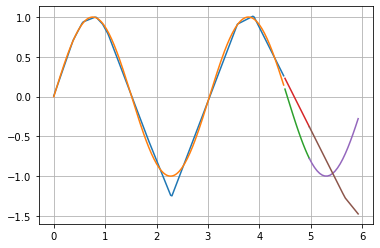

In [33]:
plt.plot(x_train, train_predictions)
plt.plot(x_train, y_train)
plt.plot(x_test, y_test)
plt.plot(x_test, test_predictions)
next_segment = np.arange(x_test[-1], x_test[-1] + 1, 0.05)
plt.plot(next_segment, xt(next_segment))
plt.plot(next_segment, approx_model.predict(next_segment))
plt.grid(True)
plt.show()

In [27]:
del approx_model
approx_model = keras.Sequential([
    keras.Input(shape=(1,)),
    layers.Dense(10, activation='ы', use_bias=True),
    layers.Dense(10, activation='relu', use_bias=True),
    layers.Dense(1)
])
approx_model.compile(
    loss='mse',
    optimizer=keras.optimizers.Adamax(learning_rate=0.01),
    metrics=['mse', 'mae', keras.metrics.RootMeanSquaredError()]
)

In [28]:
approx_model.fit(x_train, y_train, batch_size=20, epochs=800)

Train on 180 samples
Epoch 1/800
180/180 [==============================] - 1s 8ms/sample - loss: 0.8006 - mse: 0.8006 - mae: 0.7517 - root_mean_squared_error: 0.8948
Epoch 2/800
180/180 [==============================] - 0s 133us/sample - loss: 0.4650 - mse: 0.4650 - mae: 0.5929 - root_mean_squared_error: 0.6819
Epoch 3/800
180/180 [==============================] - 0s 135us/sample - loss: 0.4696 - mse: 0.4696 - mae: 0.5808 - root_mean_squared_error: 0.6853
Epoch 4/800
180/180 [==============================] - 0s 129us/sample - loss: 0.4632 - mse: 0.4632 - mae: 0.5810 - root_mean_squared_error: 0.6806
Epoch 5/800
180/180 [==============================] - 0s 130us/sample - loss: 0.4609 - mse: 0.4609 - mae: 0.5904 - root_mean_squared_error: 0.6789
Epoch 6/800
180/180 [==============================] - 0s 130us/sample - loss: 0.4594 - mse: 0.4594 - mae: 0.5944 - root_mean_squared_error: 0.6778
Epoch 7/800
180/180 [==============================] - 0s 122us/sample - loss: 0.4583 - mse: 

In [29]:
train_predictions = approx_model.predict(x_train)
test_predictions = approx_model.predict(x_test)

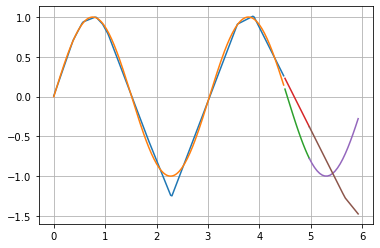

In [32]:
plt.plot(x_train, train_predictions)
plt.plot(x_train, y_train)
plt.plot(x_test, y_test)
plt.plot(x_test, test_predictions)
next_segment = np.arange(x_test[-1], x_test[-1] + 1, 0.05)
plt.plot(next_segment, xt(next_segment))
plt.plot(next_segment, approx_model.predict(next_segment))
plt.grid(True)
plt.show()